In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ILV01.0 Read data into pandas dataframe

Dataframes are two-dimensional in nature
- organized in a row/column structure just as a spreadsheet
- The main benefits of using Dataframes: a Dataframe can handle much larger data than most common spreadsheet software.

ILV01.0 a) Specify path to the CSV containing weather data from Australia and load it into memory using pandas.


In [2]:
df = pd.read_csv('../Datasets/weatherAUS.csv')

ILV01.0 b) Access some rows to get an idea of the data's structure.

In [3]:
# TODO: use functions 'head', 'sample' or 'tail' to display data

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### ILV01.1 Preprocessing
#### Try to extract useful information about the dataset using tools you already got to know during the Feature Engineering course.

ILV01.1 a) How many rows/columns are in this dataset?

In [4]:
# TODO: use attribute 'shape' of dataframe to access dimensions, save original shape for later use
original_shape = df.shape
print('# of rows: {:d}'.format(original_shape[0]))
print('# of cols: {:d}'.format(original_shape[1]))

# of rows: 142193
# of cols: 24


ILV01.1 b) Examine datatypes ('dtypes' in pandas) of the columns in your dataset.

In [5]:
# TODO: use function 'info' or attribute 'dtypes'
df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

ILV01.1 c) Examine statistics of the columns in your dataset. Print mean, std, min and max for each column.

In [6]:
# TODO: use function 'describe' without parameters to examine statistical characteristics of numeric columns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [7]:
# TODO: use the parameter include of the 'describe' function to print statistics of other datatypes
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2014-05-21,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


#### Missing Values

ILV01.1 d) Drop columns that contain > 1/3 NaN values.

In [8]:
# TODO: Display the number of NaNs in each columns with function 'isna'
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [9]:
# TODO: Iterate over columns in dataframe to drop each column that contains >1/3 NaNs.
for col in df:
    if df[col].isna().sum() / df.shape[0] >= 0.33:
        print("Dropped column {:s} because it contained a ratio of {:.3f} of NaNs.".format(col, df[col].isna().sum() / df.shape[0]))
        df = df.drop(columns=col)

Dropped column Evaporation because it contained a ratio of 0.428 of NaNs.
Dropped column Sunshine because it contained a ratio of 0.477 of NaNs.
Dropped column Cloud9am because it contained a ratio of 0.377 of NaNs.
Dropped column Cloud3pm because it contained a ratio of 0.402 of NaNs.


In [10]:
# TODO: Display the number of NaNs in each columns with function 'isna'
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [11]:
# TODO: use attribute 'shape' of dataframe to access dimensions
print('# of rows: {:d}'.format(df.shape[0]))
print('# of cols: {:d}'.format(df.shape[1]))

# of rows: 142193
# of cols: 20


ILV01.1 e) Choose what to do about the remaining number of NaNs:

- Option 0: Decide on a strategy to fill missing values. Be aware: columns have to be treated individually to account for numeric and non-numeric datatypes.
- Option 1: Drop rows containing missing values.

In [12]:
# TODO: decide which option you want to choose.
# 0: iterate over columns, determine if the column is numeric, and use function 'fillna' to fill in the mean of this column for each missing value.
#    if column is non-numeric, use pandas Class 'Categorical' and its attribute 'codes' to retrieve a numerical representation of the column.
# 1: drop each row that contains NaNs by using function 'dropna' with the correct axis
option = 1

if option:
    df = df.dropna(axis=0)
else:
    from pandas.api.types import is_numeric_dtype
    for col in df:
        if is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(np.mean(df[col]))
            print("Filled {:d} NaNs in column {:s} with mean of this column because it is numerical.".format(df[col].isna().sum(), col))
        else:
            if df[col].isna().sum() > 0:
                print("Filled {:d} NaNs in column {:s} with categorical codes of this column because it is non-numerical.".format(df[col].isna().sum(), col))
                df[col] = pd.Categorical(df[col]).codes
            else:
                print("Ignored column {:s}.".format(col))

In [13]:
# TODO: Display the number of NaNs in each columns with function 'isna'
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [14]:
# TODO: use attribute 'shape' of dataframe to access dimensions
print('# of rows:\t\t{:d}'.format(df.shape[0]))
print('# of cols:\t\t{:d}'.format(df.shape[1]))

print ('# of dropped rows:\t{:d}'.format(original_shape[0] - df.shape[0]))
print ('# of dropped cols\t{:d}'.format(original_shape[1] - df.shape[1]))

# of rows:		112925
# of cols:		20
# of dropped rows:	29268
# of dropped cols	4


ILV01.1 f) Drop RISK_MM as it contains the amount of rain that was recorded on the next day in millimeters which gives away too much information for your model. Read more here: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/discussion/78316)

In [15]:
# TODO: use function 'drop' with its 'columns' parameter to drop specific columns by name.
df = df.drop(columns=['RISK_MM'])

In [16]:
# TODO: use attribute 'shape' of dataframe to access dimensions
print('# of cols: {:d}'.format(df.shape[1]))
df.head()

# of cols: 19


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


ILV01.1 g) Encode remaining non-numerical values into categories (integers).

In [17]:
# TODO: use pandas Class 'Categorical' and its attribute 'codes' to retrieve a numerical representation of the column.
# Do this only for non-numeric columns in the dataframe.
from pandas.api.types import is_numeric_dtype
for col in df:
    if not is_numeric_dtype(df[col]):
        df[col] = pd.Categorical(df[col]).codes
        print("Encoded column {:s} to numerical categories".format(col))

Encoded column Date to numerical categories
Encoded column Location to numerical categories
Encoded column WindGustDir to numerical categories
Encoded column WindDir9am to numerical categories
Encoded column WindDir3pm to numerical categories
Encoded column RainToday to numerical categories
Encoded column RainTomorrow to numerical categories


In [18]:
#TODO: print head & info of dataframe to check contents and datatypes of dataframe!
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,377,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,378,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,379,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,380,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,381,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 142192
Data columns (total 19 columns):
Date             112925 non-null int16
Location         112925 non-null int8
MinTemp          112925 non-null float64
MaxTemp          112925 non-null float64
Rainfall         112925 non-null float64
WindGustDir      112925 non-null int8
WindGustSpeed    112925 non-null float64
WindDir9am       112925 non-null int8
WindDir3pm       112925 non-null int8
WindSpeed9am     112925 non-null float64
WindSpeed3pm     112925 non-null float64
Humidity9am      112925 non-null float64
Humidity3pm      112925 non-null float64
Pressure9am      112925 non-null float64
Pressure3pm      112925 non-null float64
Temp9am          112925 non-null float64
Temp3pm          112925 non-null float64
RainToday        112925 non-null int8
RainTomorrow     112925 non-null int8
dtypes: float64(12), int16(1), int8(6)
memory usage: 12.1 MB


#### Extract Labels

ILV01.1 h) Construct X and Y. Where X contains all numeric columns that are possible feature candidates and Y denotes the corresponding labels.

In [20]:
# TODO: drop column 'RainTomorrow' after saving it in y
y = df['RainTomorrow']
X = df.drop(columns='RainTomorrow')

### ILV01.2 EDA

ILV01.2 a) Draw plots of your dataset to further examine its properties.

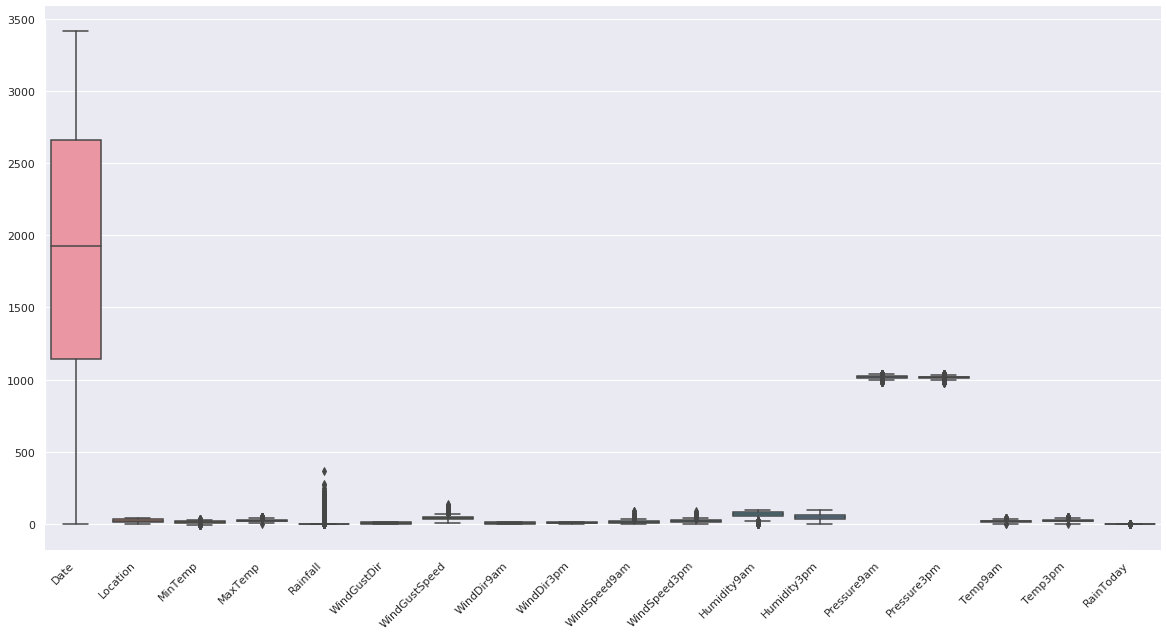

In [80]:
plt.figure(figsize=(20,10))
sns.boxplot(data=X)
sns.despine(offset=0,
            trim=True)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
);

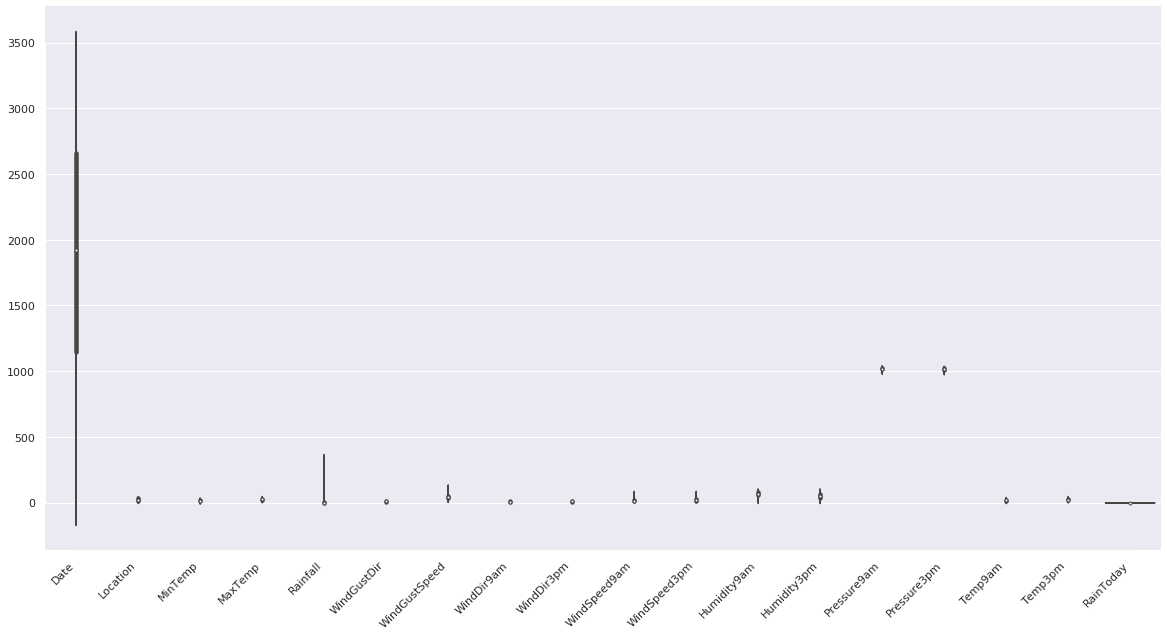

In [79]:
plt.figure(figsize=(20,10))
sns.violinplot(data=X)
sns.despine(offset=0,
            trim=True)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
);

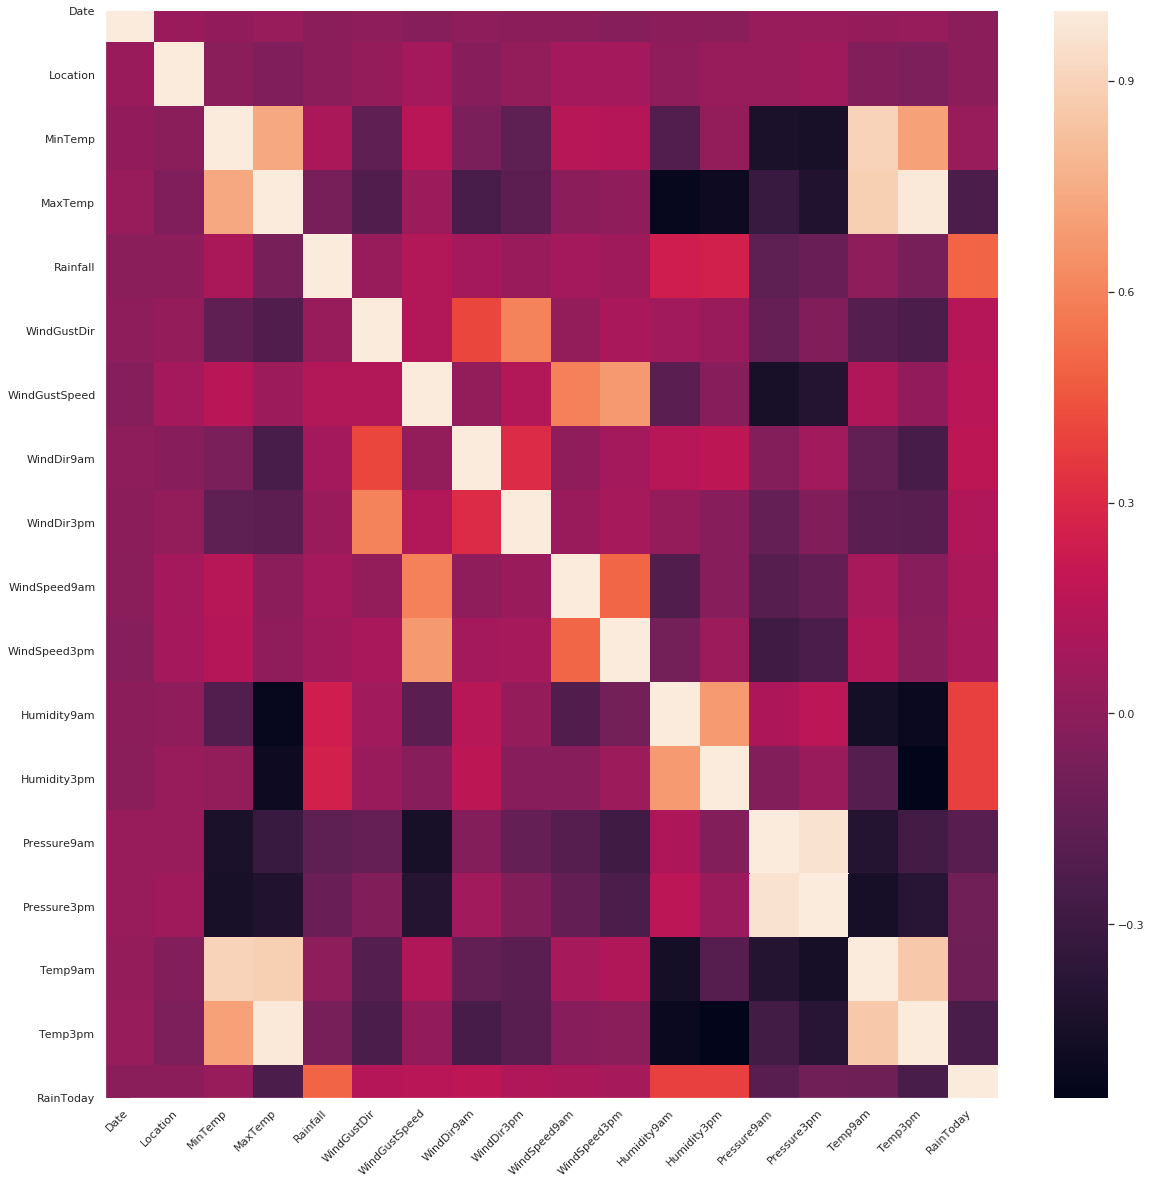

In [82]:
corr = X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, )
sns.despine(offset=0, trim=True)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
);

<Figure size 1440x720 with 0 Axes>

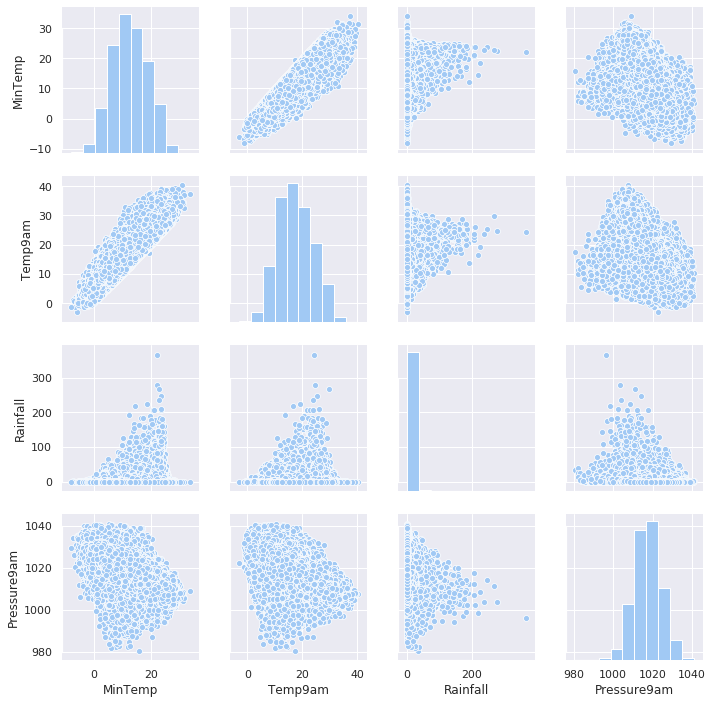

In [84]:
plt.figure(figsize=(20,10))
sns.pairplot(data=X[['MinTemp', 'Temp9am', 'Rainfall', 'Pressure9am']])
sns.despine(offset=0,
            trim=True)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
);

ILV01.2 b) Based on the information presented in ILV01.2 a), decide which columns to drop to further reduce dimensionality of the dataset.

In [87]:
X = X.drop(columns=[
    #'col_1', 'col_2', ...
])

### ILV01.3 Sampling

ILV01.3 a) Split your dataset into a train set and test set to be able to train and evaluate a classifier.

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None, stratify=y)

### ILV01.4 Training & Testing

ILV01.4 a) Train a Naive Bayes classifier using your train data.

In [101]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train);

ILV01.4 a) Feed the testing data into the classifier and retrieve predictions.

In [102]:
y_pred = gnb.predict(X_test)

### ILV01.5 Evaluation

ILV01.5 a) Use different metrics to evaluate the training result.

In [103]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 37266 points : 7022


In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# TODO: Confusion Matrix, ...

0.8115708688885311

### ILV01.6 Back to the Drawing Board ...

ILV01.6 a) Revisit EDA & Feature Engineering to further improve your result!